# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv(r'C:\\Users\\user\\Desktop\\data\\rideshare.csv')

In [3]:
pd.set_option("display.max_columns",None)
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
data.shape

(693071, 57)

In [5]:
extra_cols = ['apparentTemperatureMaxTime','apparentTemperatureMax','apparentTemperatureMinTime','apparentTemperatureMin',
               'temperatureMaxTime','temperatureMax','temperatureMinTime','temperatureMin',
                'uvIndexTime','precipIntensityMax','moonPhase','sunsetTime','sunriseTime','ozone',
                 'visibility.1','uvIndex','cloudCover','windBearing','pressure','dewPoint',
                 'apparentTemperatureLowTime','apparentTemperatureLow','apparentTemperatureHighTime',
                 'apparentTemperatureHigh','temperatureLowTime','temperatureLow','temperatureHighTime',
                 'temperatureHigh','visibility','windGustTime','windGust','windSpeed','humidity',
                 'precipProbability','precipIntensity','apparentTemperature','timestamp']
    

In [6]:
# Drop irrelevant (for this analysis) columns
data = data.drop(extra_cols, axis =1)
data.head()

,id,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


In [7]:
print(data.isnull().sum())

id                      0
hour                    0
day                     0
month                   0
datetime                0
timezone                0
source                  0
destination             0
cab_type                0
product_id              0
name                    0
price               55095
distance                0
surge_multiplier        0
latitude                0
longitude               0
temperature             0
short_summary           0
long_summary            0
icon                    0
dtype: int64


Null values account for 8% of the data so we will drop them.

In [8]:
data = data.dropna()

In [9]:
# Check again
print(data.isnull().sum())


id                  0
hour                0
day                 0
month               0
datetime            0
timezone            0
source              0
destination         0
cab_type            0
product_id          0
name                0
price               0
distance            0
surge_multiplier    0
latitude            0
longitude           0
temperature         0
short_summary       0
long_summary        0
icon                0
dtype: int64


In [10]:
data.dtypes

id                   object
hour                  int64
day                   int64
month                 int64
datetime             object
timezone             object
source               object
destination          object
cab_type             object
product_id           object
name                 object
price               float64
distance            float64
surge_multiplier    float64
latitude            float64
longitude           float64
temperature         float64
short_summary        object
long_summary         object
icon                 object
dtype: object

In [11]:
# Convert to datetime
data['DATE_TIME'] = pd.to_datetime(data['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [12]:
# Break apart into components \n"

data['HOUR'] = data['DATE_TIME'].apply(lambda x: x.hour)
data['DAY'] = data['DATE_TIME'].apply(lambda x: x.day)
data['MONTH']  = data['DATE_TIME'].apply(lambda x: x.month)
data['WEEKDAY'] = data['DATE_TIME'].apply(lambda x: calendar.day_name[x.dayofweek])
data['DAY_OF_WEEK'] = data['DATE_TIME'].apply(lambda x: x.dayofweek)

In [13]:
data = data.drop(['datetime'], axis=1)

In [14]:
data.head()

,id,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,icon,DATE_TIME,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,2018-12-16 09:30:07,9,16,12,Sunday,6
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,Rain,"Rain until morning, starting again in the eve...",rain,2018-11-27 02:00:23,2,27,11,Tuesday,1
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,Clear,Light rain in the morning.,clear-night,2018-11-28 01:00:22,1,28,11,Wednesday,2
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,Clear,Partly cloudy throughout the day.,clear-night,2018-11-30 04:53:02,4,30,11,Friday,4
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,2018-11-29 03:49:20,3,29,11,Thursday,3


Text(0.5, 1.0, 'Number of trips vs. hours')

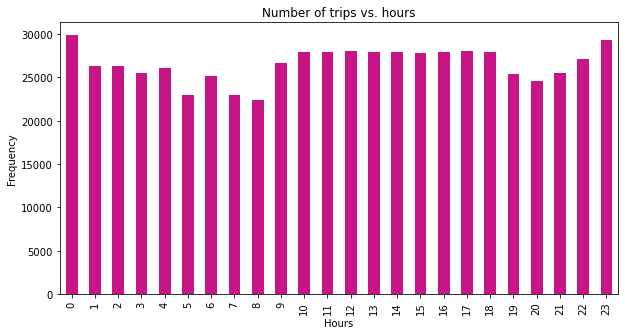

In [15]:
# Most frequent travel hours
hours = data['HOUR'].value_counts() # How often the hour 'pops up'
hours.sort_index().plot(kind = 'bar', color = 'mediumvioletred', figsize = (10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs. hours')

A seemingly even distribution of rides at each hour of the day with a slight dip in theearly hours of the morning

Text(0.5, 1.0, 'Number of trips vs. days')

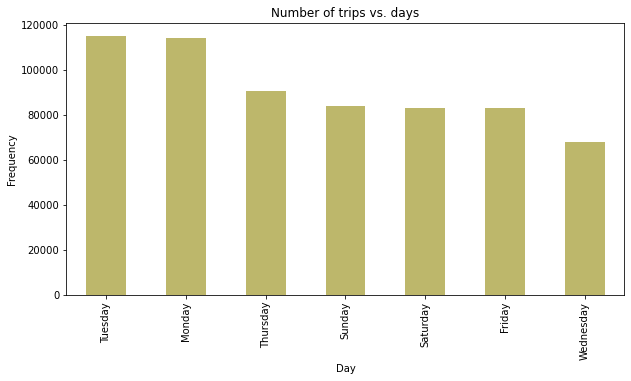

In [16]:
days = data['WEEKDAY'].value_counts()
days.plot(kind = 'bar', color = 'darkkhaki',figsize=(10,5))
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Number of trips vs. days')

Most rides ordered at the beginning of the week (Monday and Tuesday) with a slight dip in the midweek (Wednesday). Maybe due to more productivity on thos days in terms of work movement

([<matplotlib.axis.XTick at 0x247877a23d0>,
 [Text(0, 0, 'Nov'), Text(1, 0, 'Dec')])

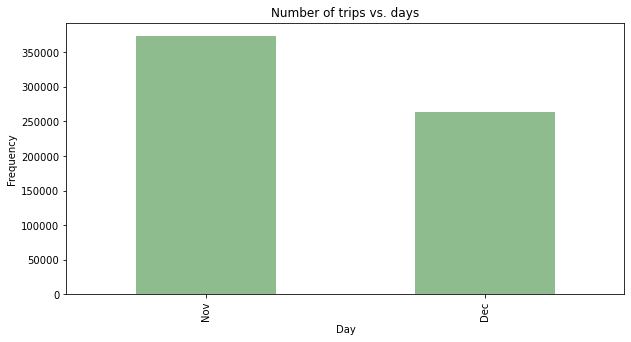

In [17]:
days = data['MONTH'].value_counts()
days.plot(kind = 'bar', color = 'darkseagreen',figsize=(10,5))
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Number of trips vs. days')
plt.xticks((0,1), ('Nov','Dec'))

More trips taken in November than in December. This may be due to less work related travel.

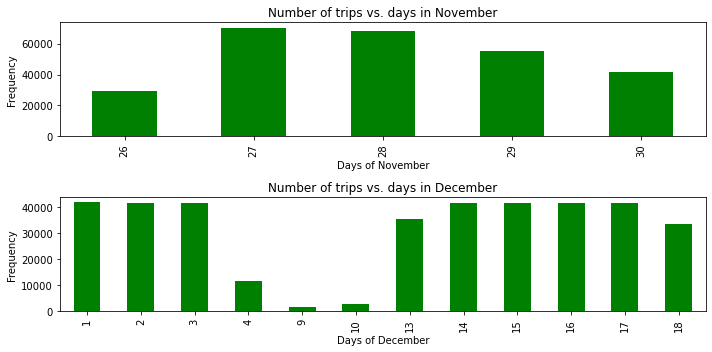

In [18]:
plt.subplot(2, 1, 1)
months = data['DAY'][data['MONTH']==11].value_counts()
months.sort_index().plot(kind = 'bar', color = 'green',figsize=(10,5))
plt.xlabel('Days of November')
plt.ylabel('Frequency')
plt.title('Number of trips vs. days in November')

plt.subplot(2, 1, 2)
months1 = data['DAY'][data['MONTH']==12].value_counts()
months1.sort_index().plot(kind = 'bar', color = 'green',figsize=(10,5))
plt.xlabel('Days of December')
plt.ylabel('Frequency')
plt.title('Number of trips vs. days in December')
plt.tight_layout() 
plt.show()

The trips are absent trips for certain days and only trips for November in the last few days of the month. This may need to be investgated further to interrogate the quality of the data

In [19]:
nov = data['DAY'][data['MONTH']==11].value_counts().sum()
dec = data['DAY'][data['MONTH']==12].value_counts().sum()
dec + nov

637976

This seems to check out. We will continue the analysis for the sake of completing te project however the data needs to be investgiated further I welcome anyone with advice or an opinion as to the why the distributions are this way.

Text(0.5, 1.0, 'Frequency of pickup points')

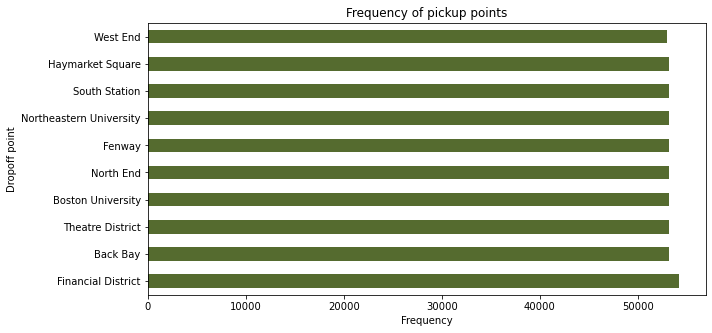

In [20]:
months = data['source'].value_counts().nlargest(10)
months.plot(kind = 'barh', color = 'darkolivegreen',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Dropoff point')
plt.title('Frequency of pickup points')

Text(0.5, 1.0, 'Frequency of dropoff points')

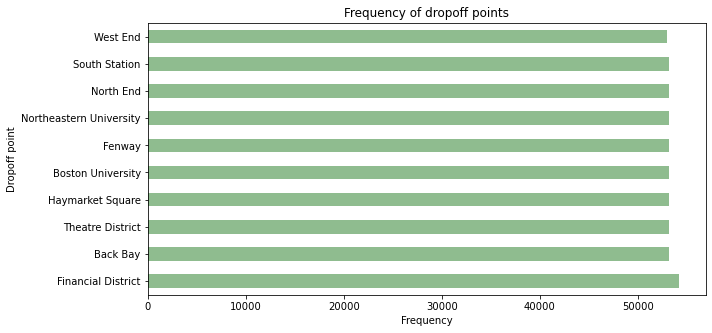

In [21]:
months = data['destination'].value_counts().nlargest(10)
months.plot(kind = 'barh', color = 'darkseagreen',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Dropoff point')
plt.title('Frequency of dropoff points')

An even distribution of the pickup and dropoff points. Let's look at combined data.

Text(0.5, 1.0, 'Frequency of dropoff points')

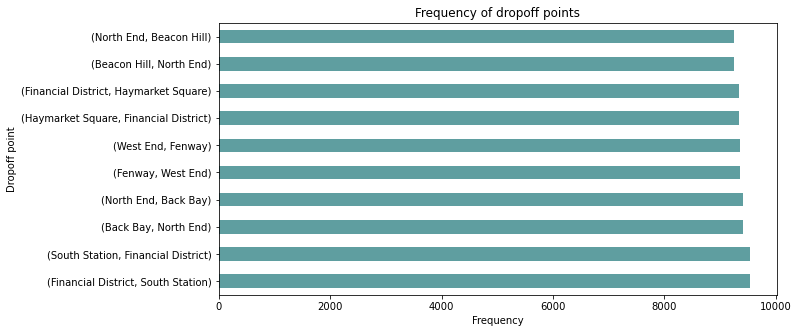

In [22]:
data.groupby('source')['destination'].value_counts().nlargest(10).plot(kind = 'barh', color = 'cadetblue',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Dropoff point')
plt.title('Frequency of dropoff points')

An even distribution of trips with the most being between the Financial District and South Station.

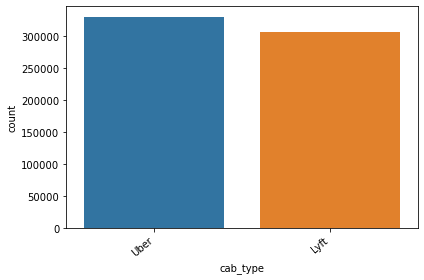

In [23]:
ax = sns.countplot(x = 'cab_type', data = data, order = data['cab_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

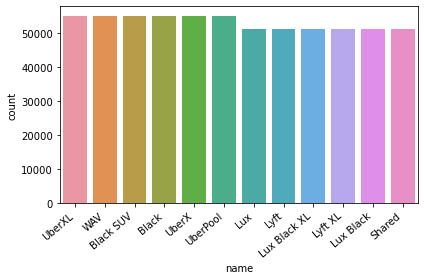

In [24]:
ax = sns.countplot(x = 'name', data = data, order = data['name'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

Uber is slighly more popular than lift within the Boston area with a fairly even distribution of the cab types.

# Using different Machine Learning Models to predict the Uber trip price

In [43]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





In [26]:
data = data.drop(['DAY_OF_WEEK'], axis=1)
data = data.drop(['HOUR'], axis=1)
data = data.drop(['DAY'], axis=1)
data = data.drop(['MONTH'], axis=1)

In [27]:
# Convert all categorical data into numeric type using label encoding\n",
 
data['id'] = label_encoder.fit_transform(data['id'])
 
data['DATE_TIME'] = label_encoder.fit_transform(data['DATE_TIME'])
#print('Class mappin of datetime: ')
#for i, item in enumerate(label_encoder.classes_):
    #print(item,\"-->\", i)
    
data['timezone'] = label_encoder.fit_transform(data['timezone'])
    
data['destination'] = label_encoder.fit_transform(data['destination'])

data['product_id'] = label_encoder.fit_transform(data['product_id'])
 
data['short_summary'] = label_encoder.fit_transform(data['short_summary'])

data['long_summary'] = label_encoder.fit_transform(data['long_summary'])
     
data['WEEKDAY'] = label_encoder.fit_transform(data['WEEKDAY'])   

    

In [28]:
print('Class mapping of name: ')
data['name'] = label_encoder.fit_transform(data['name'])
for i, item in enumerate(label_encoder.classes_):
    print(item,"-->",i)

Class mapping of name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [29]:
print('Class mapping of source: ')
data['source'] = label_encoder.fit_transform(data['source'])
for i, item in enumerate(label_encoder.classes_):
    print(item,"-->",i)

Class mapping of source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [30]:
print('Class mapping of weather: ')
data['icon'] = label_encoder.fit_transform(data['icon'])
for i, item in enumerate(label_encoder.classes_):
    print(item,"-->",i)

Class mapping of weather: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [31]:
print('Class mapping of cab type: ')
data['cab_type'] = label_encoder.fit_transform(data['cab_type'])
for i, item in enumerate(label_encoder.classes_):
    print(item,"-->",i)

Class mapping of cab type: 
Lyft --> 0
Uber --> 1


In [32]:
# Only making predictions for Uber 

len(data[data['cab_type']==1])

330568

In [33]:
# Creation of Training Dataset with the price as the target

X = data[data['cab_type']==1].drop(['price','cab_type'],axis=1)
Y = data[data['cab_type']==1]['price']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
# Function that assess the different models 

def train_test_models(X_train, y_train, X_test, y_test):
    print("Linear Regression...")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(X_train, y_train)
    print(lr_model.score(X_test, y_test))
    
    print("Decision Tree...")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth=10)
    dt_model = dt_model.fit(X_train, y_train)
    print(dt_model.score(X_test, y_test)) 
    
    print("Random Forest...")
    rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    rf_model = rf_model.fit(X_train, y_train)
    print(rf_model.score(X_test, y_test))
    
    return [lr_model, dt_model, rf_model]
    
    

In [45]:
print(train_test_models(X_train, y_train, X_test, y_test))

Linear Regression...
0.6525142201061047
Decision Tree...
0.9493474976476252
Random Forest...
0.9450441293900691
[LinearRegression(), DecisionTreeRegressor(max_depth=10, random_state=0), RandomForestRegressor(random_state=0)]


The most accurate predictions came from the Random Forest and Decision Tree models whilst the lowest came from Linear Regression (obviously implying a non-linear relationship as expected). Given more time this result should be evaluated for its meaning and significance. 